# Project - Statistical Learning

### - Project submitted by Abhik Kar
####   Date - 29-Feb-2020

##### 1. Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as f

##### 2. Reading the data as a data frame

In [2]:
df=pd.read_csv("insurance.csv")

In [3]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


##### 3. Exploratory Data Analysis

In [4]:
# a. Shape of the data -> Number of rows and columns
print(df.shape)

(1338, 7)


In [5]:
# b. Data type of each attribute
print(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [6]:
# c. Checking the presence of missing values
df[df.isnull().any(axis=1)].head()

,age,sex,bmi,children,smoker,region,charges


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


* No missing value present in the Insurance data.

In [9]:
# d. Five point summary of numerical attributes
df.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.21,14.05,18.00,27.00,39.00,51.00,64.00
bmi,1338.0,30.66,6.10,15.96,26.30,30.40,34.69,53.13
children,1338.0,1.09,1.21,0.00,0.00,1.00,2.00,5.00
charges,1338.0,13270.42,12110.01,1121.87,4740.29,9382.03,16639.91,63770.43


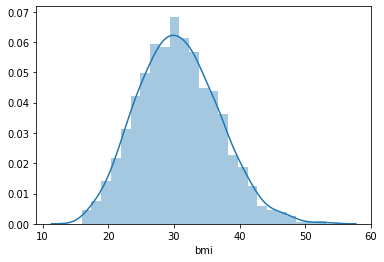

In [10]:
# e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns
sns.distplot(df['bmi']) #Univariate Distribution

##### BMI is normally distributed and have a distribution like standard normal distribution of a bell curve

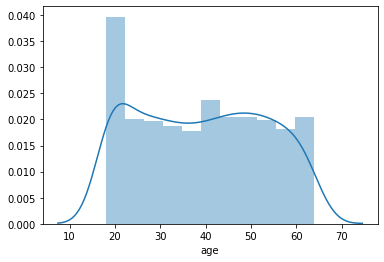

In [11]:
sns.distplot(df['age']) #Univariate Distribution

##### Age seems to be bimodal distribution and not a perfect symmetrical bell curve

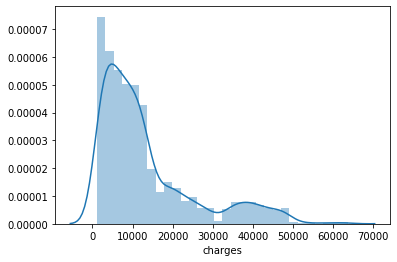

In [12]:
sns.distplot(df['charges']) #Univariate Distribution

##### Charges distribution is normally distributed but not a symmetrical bell curve

In [13]:
# f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns
df.skew(axis=0).round(3)

age         0.056
bmi         0.284
children    0.938
charges     1.516
dtype: float64

##### Positive values denotes a positive skewness in the data. 
##### This shows all the numerical attributes are distributed with a longer tail towards the right side of the distribution. 
##### Charges distribution has more positive skewness than BMI and BMI has more positive skewness than age data set distribution. 

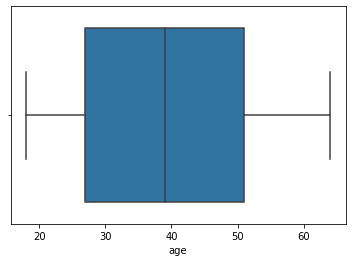

In [14]:
# g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns
sns.boxplot(df['age'])

* Age doesn'thave any extreme outlier. Max / Min value is within 1.5 times of IQR. 

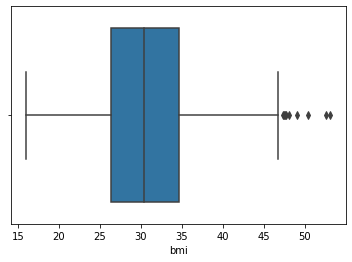

In [15]:
sns.boxplot(df['bmi'])

* There are some outliers present in the BMI data. Max value is 53.13 and some more data points are beyond the right whisker which is 1.5 times of IQR

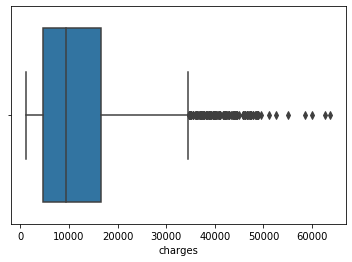

In [16]:
sns.boxplot(df['charges'])

* There are many outliers present in the Chrages data. Data is wide spread. Many data points are beyond the upper quartile i.e. right whisker which is 1.5 times of IQR

In [17]:
# h. Distribution of categorical columns (include children)
df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

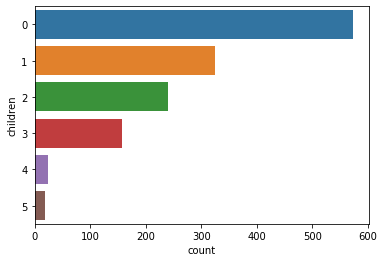

In [18]:
sns.countplot(y="children", data=df, order=df['children'].value_counts().index )

* There 6 different categories in Children column. 
* Number of children covered by health insurance starting from 0 upto 6 children. 
* Having 0 or no children is the maximum number which is close to double than second highest number of having 1 child.

In [19]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

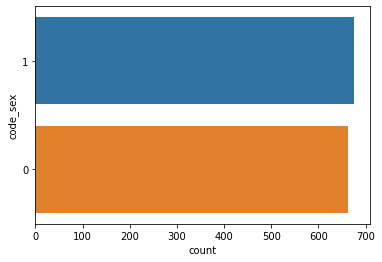

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['code_sex']=le.fit_transform(df.sex)
sns.countplot(y="code_sex", data=df, order=df['code_sex'].value_counts().index)

* There 2 different categories in sex column - male & female. 

In [22]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

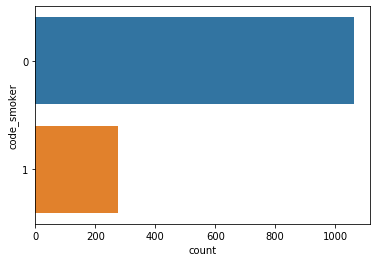

In [23]:
df['code_smoker']=le.fit_transform(df.smoker)
sns.countplot(y="code_smoker", data=df, order=df['code_smoker'].value_counts().index)

##### There 2 different categories in smoker column.

In [24]:
df.region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

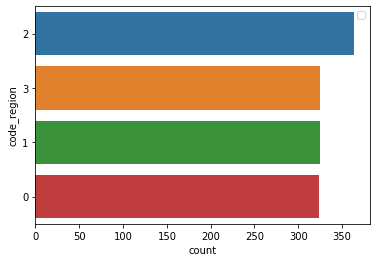

In [26]:
df['code_region']=le.fit_transform(df.region)
ax = sns.countplot(y="code_region", data=df, order=df['code_region'].value_counts().index)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

handles = ["SE", "NW", "SW", "NE"]
labels = ["southeast", "northwest", "southwest", "northeast"]

In [27]:
df.code_region.value_counts()

2    364
3    325
1    325
0    324
Name: code_region, dtype: int64

##### There 4 different categories in region column. Southeast region has slightly higher count or volume

In [28]:
df.drop(['code_sex','code_smoker','code_region'], axis=1,inplace=True) #Dropping additional columns added for converting categorical data to corresponding code

In [29]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


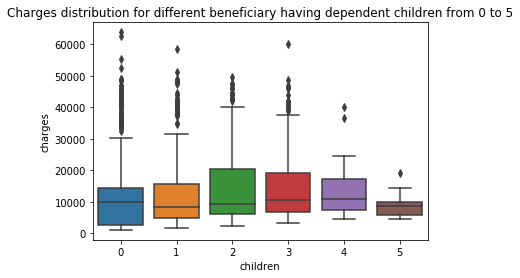

In [21]:
sns.boxplot(x = "children", y = "charges", data = df)
plt.title('Charges distribution for different beneficiary having dependent children from 0 to 5')
plt.show()

* Beneficiaries with having less dependent children including no children have more outliers in charges

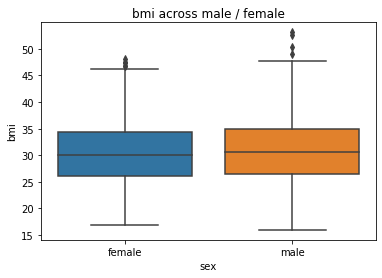

In [24]:
sns.boxplot(x = "sex", y = "bmi", data = df)
plt.title('bmi across male / female')
plt.show()

* males have more outliers in BMI 
* more outliers are there in males having higher BMI comparative to females

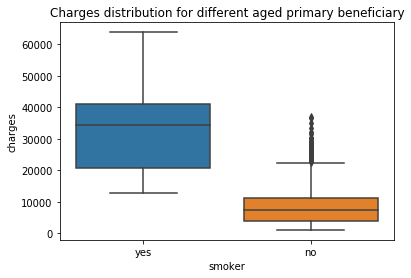

In [19]:
sns.boxplot(x = "smoker", y = "charges", data = df)
plt.title('Charges distribution for different aged primary beneficiary')
plt.show()

* There are no outlier in charges when primary beneficiary is considered as smoker
* There are lot of outlier in charges at higher side when primary beneficiary is considered as non-smoker

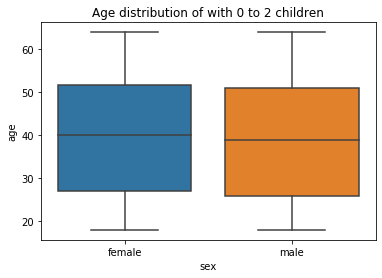

In [15]:
sns.boxplot(x = "sex", y = "age", data = df)
plt.title('Age distribution of each male & female Primary Beneficiary')
plt.show()

* Data holds same age range for each of the gender.
* Same age range of primary beneficiary data is considered for male and female

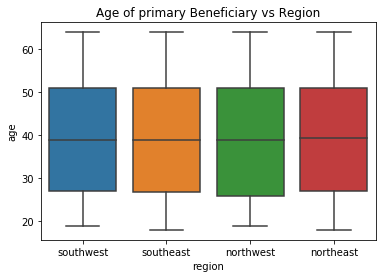

In [14]:
sns.boxplot(x = "region", y = "age", data = df)
plt.title('Age of primary Beneficiary vs Region')
plt.show()

* Sample data is taken from same age range from each of the region.
* We can also say data is collected based on age and hence age distribution is symetrical across all the region. 

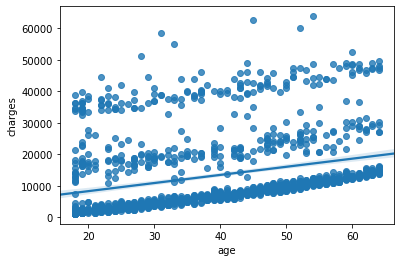

In [16]:
sns.regplot(x="age", y="charges", data=df)

* No linear relationship between age and charges and hence worth looking into other parameters to indentify which are influencing charges

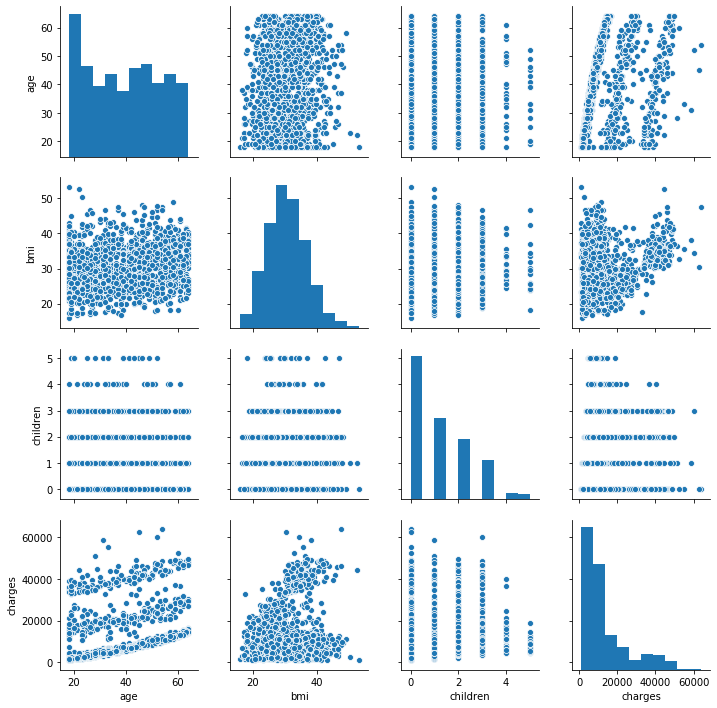

In [30]:
# i. Pair plot that includes all the columns of the data frame (4 marks)
sns.pairplot(df)

Analysis:
* There is positive corelation between age and charges.
* BMI is normally distributed and have a distribution like bell curve
* There is also some positive corelation between age and charges. However it is not evident and non-linear

### 4. Statistical evidence

#### a. Do charges of people who smoke differ significantly from the people who don't?

* Assuming the sample Insurance data represents a larger population of people who smoke and people who don't
* Independent Two Sample Test should be done with a Hypothesis that charges of people who smoke is same as charges of people who don't
* This will require a Two Tailed Test


*    H0: x̄1 = x̄2  that is , there is no difference between the sample means (No differemce in charges applied to people who smoke vs. charges applied people who don't)
*    HA: x̄1 != x̄2 , There is a significant difference
*    α = 0.05/2 = 0.025 (As Two Tailed Test at 95% Confidence level)

In [35]:
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro
from statsmodels.stats.power import ttest_power

In [31]:
x1= df.charges[df['smoker']=='yes']
x2= df.charges[df['smoker']=='no']
print('N1=',len(x1),',','N2=',len(x2))

N1= 274 , N2= 1064


In [36]:
t_statistic, p_value = ttest_ind(x1, x2)
print(t_statistic.round(2), p_value)

46.66 8.271435842177219e-283


In [37]:
# Manual Calculation to double check
N1 = len(x1)
N2 = len(x2)
d1 = N1-1
d2 = N2-1
d3 = d1+d2
s1 = np.std(x1,ddof=1)
s2 = np.std(x2,ddof=1)
x1_bar = np.mean(x1)
x2_bar = np.mean(x2)

sp = np.sqrt((d1*s1**2 + d2*s2**2)/d3)
se = sp*np.sqrt(1/N1 + 1/N2)
t = ((x2_bar - x1_bar)/(se)).round(2)
print("t-statistic", t)

t-statistic -46.66


In [38]:
t, p_twosided = stats.ttest_ind(x2, x1, equal_var=True)
print("p_twosided = ", p_twosided)

p_twosided =  8.271435842177219e-283


* 46 standard deviation is very large than 2 standard deviation at 95% confidence level.
* P_value is significantly less than α = 0.025
* Hence safely Reject the Null Hypothesis H0
* Hence there is significant difference in charges applied to people who smoke vs. charges applied people who don't

#### b. Does bmi of males differ significantly from that of females?

Assuming that bmi of males do not differ significantly from that of females. 

* Independent Two Sample Test should be done with a Hypothesis that Assuming that bmi of males do not differ significantly from that of females.

* This will require a Two Tailed Test

The null and the alternative hypothesis can be stated as:

* H0: x̄1 = x̄2 that is , there is no significant difference between the bmi of males and females
* HA: x̄1 != x̄2 , There is a significant difference
* α = 0.05/2= 0.025 (Two Tailed Test at 95% Confidence Level)


In [39]:
a1= df.bmi[df['sex']=='male']
a2= df.bmi[df['sex']=='female']

print('N1=',len(a1),',','N2=',len(a2))
print('x1 mean =',a1.mean(),',','x2 mean =',a2.mean())

N1= 676 , N2= 662
x1 mean = 30.943128698224832 , x2 mean = 30.377749244713023


In [40]:
t_statistic, p_value = ttest_ind(a1, a2)
print("t-statistics=",t_statistic.round(4),  ", P value two sided=", p_value.round(4))

t-statistics= 1.6968 , P value two sided= 0.09


As t-Statistics < t_critical and P Value (9%) is also greater than α at 95% and even at 99% Confidence level
* Hence failed to reject the Null Hypothesis
* Therefore, we can safely say bmi of males do not differ significantly from that of females

#### c. Is the proportion of smokers significantly different in different genders?

Assume there is no significant difference in the proportion of smokers in different genders.
The null and the alternative hypothesis can be stated as:

* H0: P1 = P2 that is , there is no significant difference in the proportion of smokers in different genders
* HA: P1 != P2 , There is a significant difference

Therefore:
* This is a Two Tailed Proportion Test.
* α = 0.05/2= 0.025 (Two Tailed Test at 95% Confidence Level)
* Z statistics value can be compared with Z_critical value at 95% confidence level.

In [63]:
from statsmodels.stats.proportion import proportions_ztest

In [64]:
df1=df[df['smoker'] == 'yes'].sex.value_counts()
male_smokers=df1.male
female_smokers=df1.female
print("male_smoker = ", male_smokers,",", "male_smoker = ", female_smokers)

male_smoker =  159 , male_smoker =  115


In [65]:
n_males=df[df['sex'] == 'male'].sex.value_counts()
n_females=df[df['sex'] == 'female'].sex.value_counts()
print("Total_Males = ", n_males.male,",","Total_Females = ",n_females.female)

Total_Males =  676 , Total_Females =  662


In [73]:
p_m=male_smokers/n_males.male
print ("p1 (Proportion of smokers in males) = ",(p_m.round(2)))
p_f=female_smokers/n_females.female
print ("p2 (Proportion of smokers in females) = ",(p_f.round(2)))

p1 (Proportion of smokers in males) =  0.24
p2 (Proportion of smokers in females) =  0.17


z statistics = ((p1-p2)-(Assumed mean i.e. zero))/Standard Deviation (p1-p2)

In [77]:
p1=0.24
p2=0.17
p1-p2
std_p1P2=np.sqrt((p1*(1-p1)/676)+(p2*(1-p2)/662))
z_stat=(p1-p2)/std_p1P2
z_stat.round(4)

3.1852

* z_stat is beyond 3 standard devation and hence can be rejected at confidence level 95%
* From Z Table corresponding P Value = 0.00074 which is significantly less than α = 0.025
* Hence, We can safely Reject the Hypothesis
* Therefore, we can say there is significant difference in the proportion of smokers in different genders

#### Is the distribution of bmi across women with no children, one child and two children, the same?

In [96]:
w0= df.bmi[(df['sex']=='female') & (df['children']==0)]
w1= df.bmi[(df['sex']=='female') & (df['children']==1)]
w2= df.bmi[(df['sex']=='female') & (df['children']==2)]
w_total= df.bmi[df['sex']=='female']

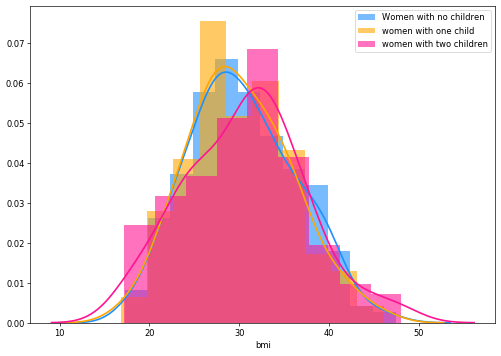

In [129]:
# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
plt.figure(figsize=(10,7), dpi= 60)
sns.distplot(w0, color="dodgerblue", label="Women with no children", **kwargs)
sns.distplot(w1, color="orange", label="women with one child", **kwargs)
sns.distplot(w2, color="deeppink", label="women with two children", **kwargs)
plt.legend();

In [161]:
print('Count, Mean and standard deviation of W0: %3d, %3.2f and %3.2f' % (len(w0), w0.mean(),np.std(w0 ,ddof =1)))
print('Count, Mean and standard deviation of w1: %3d, %3.2f and %3.2f' % (len(w1), w1.mean(),np.std(w1 ,ddof =1)))
print('Count, Mean and standard deviation of w2: %3d, %3.2f and %3.2f' % (len(w2), w2.mean(),np.std(w2 ,ddof =1)))

Count, Mean and standard deviation of W0: 289, 30.36 and 5.97
Count, Mean and standard deviation of w1: 158, 30.05 and 5.79
Count, Mean and standard deviation of w2: 119, 30.65 and 6.63


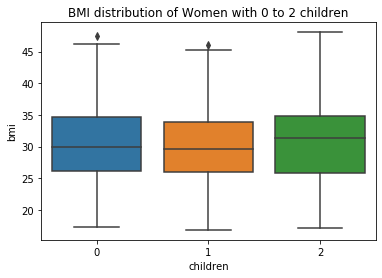

In [167]:
df_w=df[(df['children']<3) & (df['sex']=='female')]
sns.boxplot(x = "children", y = "bmi", data = df_w)
plt.title('BMI distribution of Women with 0 to 2 children')
plt.show()

Assume there is no difference in the BMI distribution for women with no children, one child and two children

The null and the alternative hypothesis can be stated as:

* H0: w0 = w1 = w2 that is , there is no difference in the BMI distribution for women with no children, one child and two children
* HA: Atleast one of them has different BMI distribution

α = 0.05

* Need to test if means of the three groups are same or not
* Anova test will be applicable in this case

In [170]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('bmi ~ children', data = df_w).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df         F   PR(>F)
children      2.512982    1.0  0.068411  0.79376
Residual  20717.738725  564.0       NaN      NaN


* p value is 0.79376 and it is greater than our chosen level of signifance at 5%
* So the statistical decision has failed to reject the null hypothesis at 5% level of significance.
* Therefore, we can safely say there is no difference in the BMI distribution for women with no children, one child and two children
* In other words, the BMI distribution for women with no children, one child and two children are same.

## End of Project